# Persiapan Awal

Cek spek nvidia di google colab

In [ ]:
!nvidia-smi

Sun Nov 19 06:53:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

ambil data direktori HOME atau default dari google colab

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install yolo

install ultralytics dan import yolo

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Download dan load Yolo Large Version

download dan load model yolo8 large version dalam bentuk ekstensi .pt

In [ ]:
model = YOLO(f'{HOME}/yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:01<00:00, 61.9MB/s]



install modul roboflow untuk mendownload dataset yang sudah dilabeli

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existi

### Download dataset dan hasil labelling dari roboflow

download dataset yang sudah dilabeli

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jPzrt0coWYniVrkXMnTN")
project = rf.workspace("krisna-wijaya-sxuzy").project("kerusakan-jalan-yolov8")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to kerusakan-jalan-yolov8-1 in yolov8:: 100%|██████████| 590/590 [00:00<00:00, 2872.88it/s]


menampilkan data lokasi folder dataset

In [ ]:
dataset.location

'/content/kerusakan-jalan-yolov8-1'

### Training Model

training model dengan file konfigurasi pada file data.yaml, epoch sebanyak 20 dan ukuran gambar 800x800 dengan plot = True yang artinya visualisasi hasil sudah dilakukan

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%cd {HOME}
%ls

!yolo task=detect mode=train data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True

/content
kerusakan-jalan-yolov8-1/  runs/  yolov8l.pt  yolov8n.pt
WARNING ⚠️ 'model' is missing. Using default 'model=yolov8n.pt'.
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/kerusakan-jalan-yolov8-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


### Confussion Matrix dan Evaluasi Lainnya

confussion matrix hasil training model

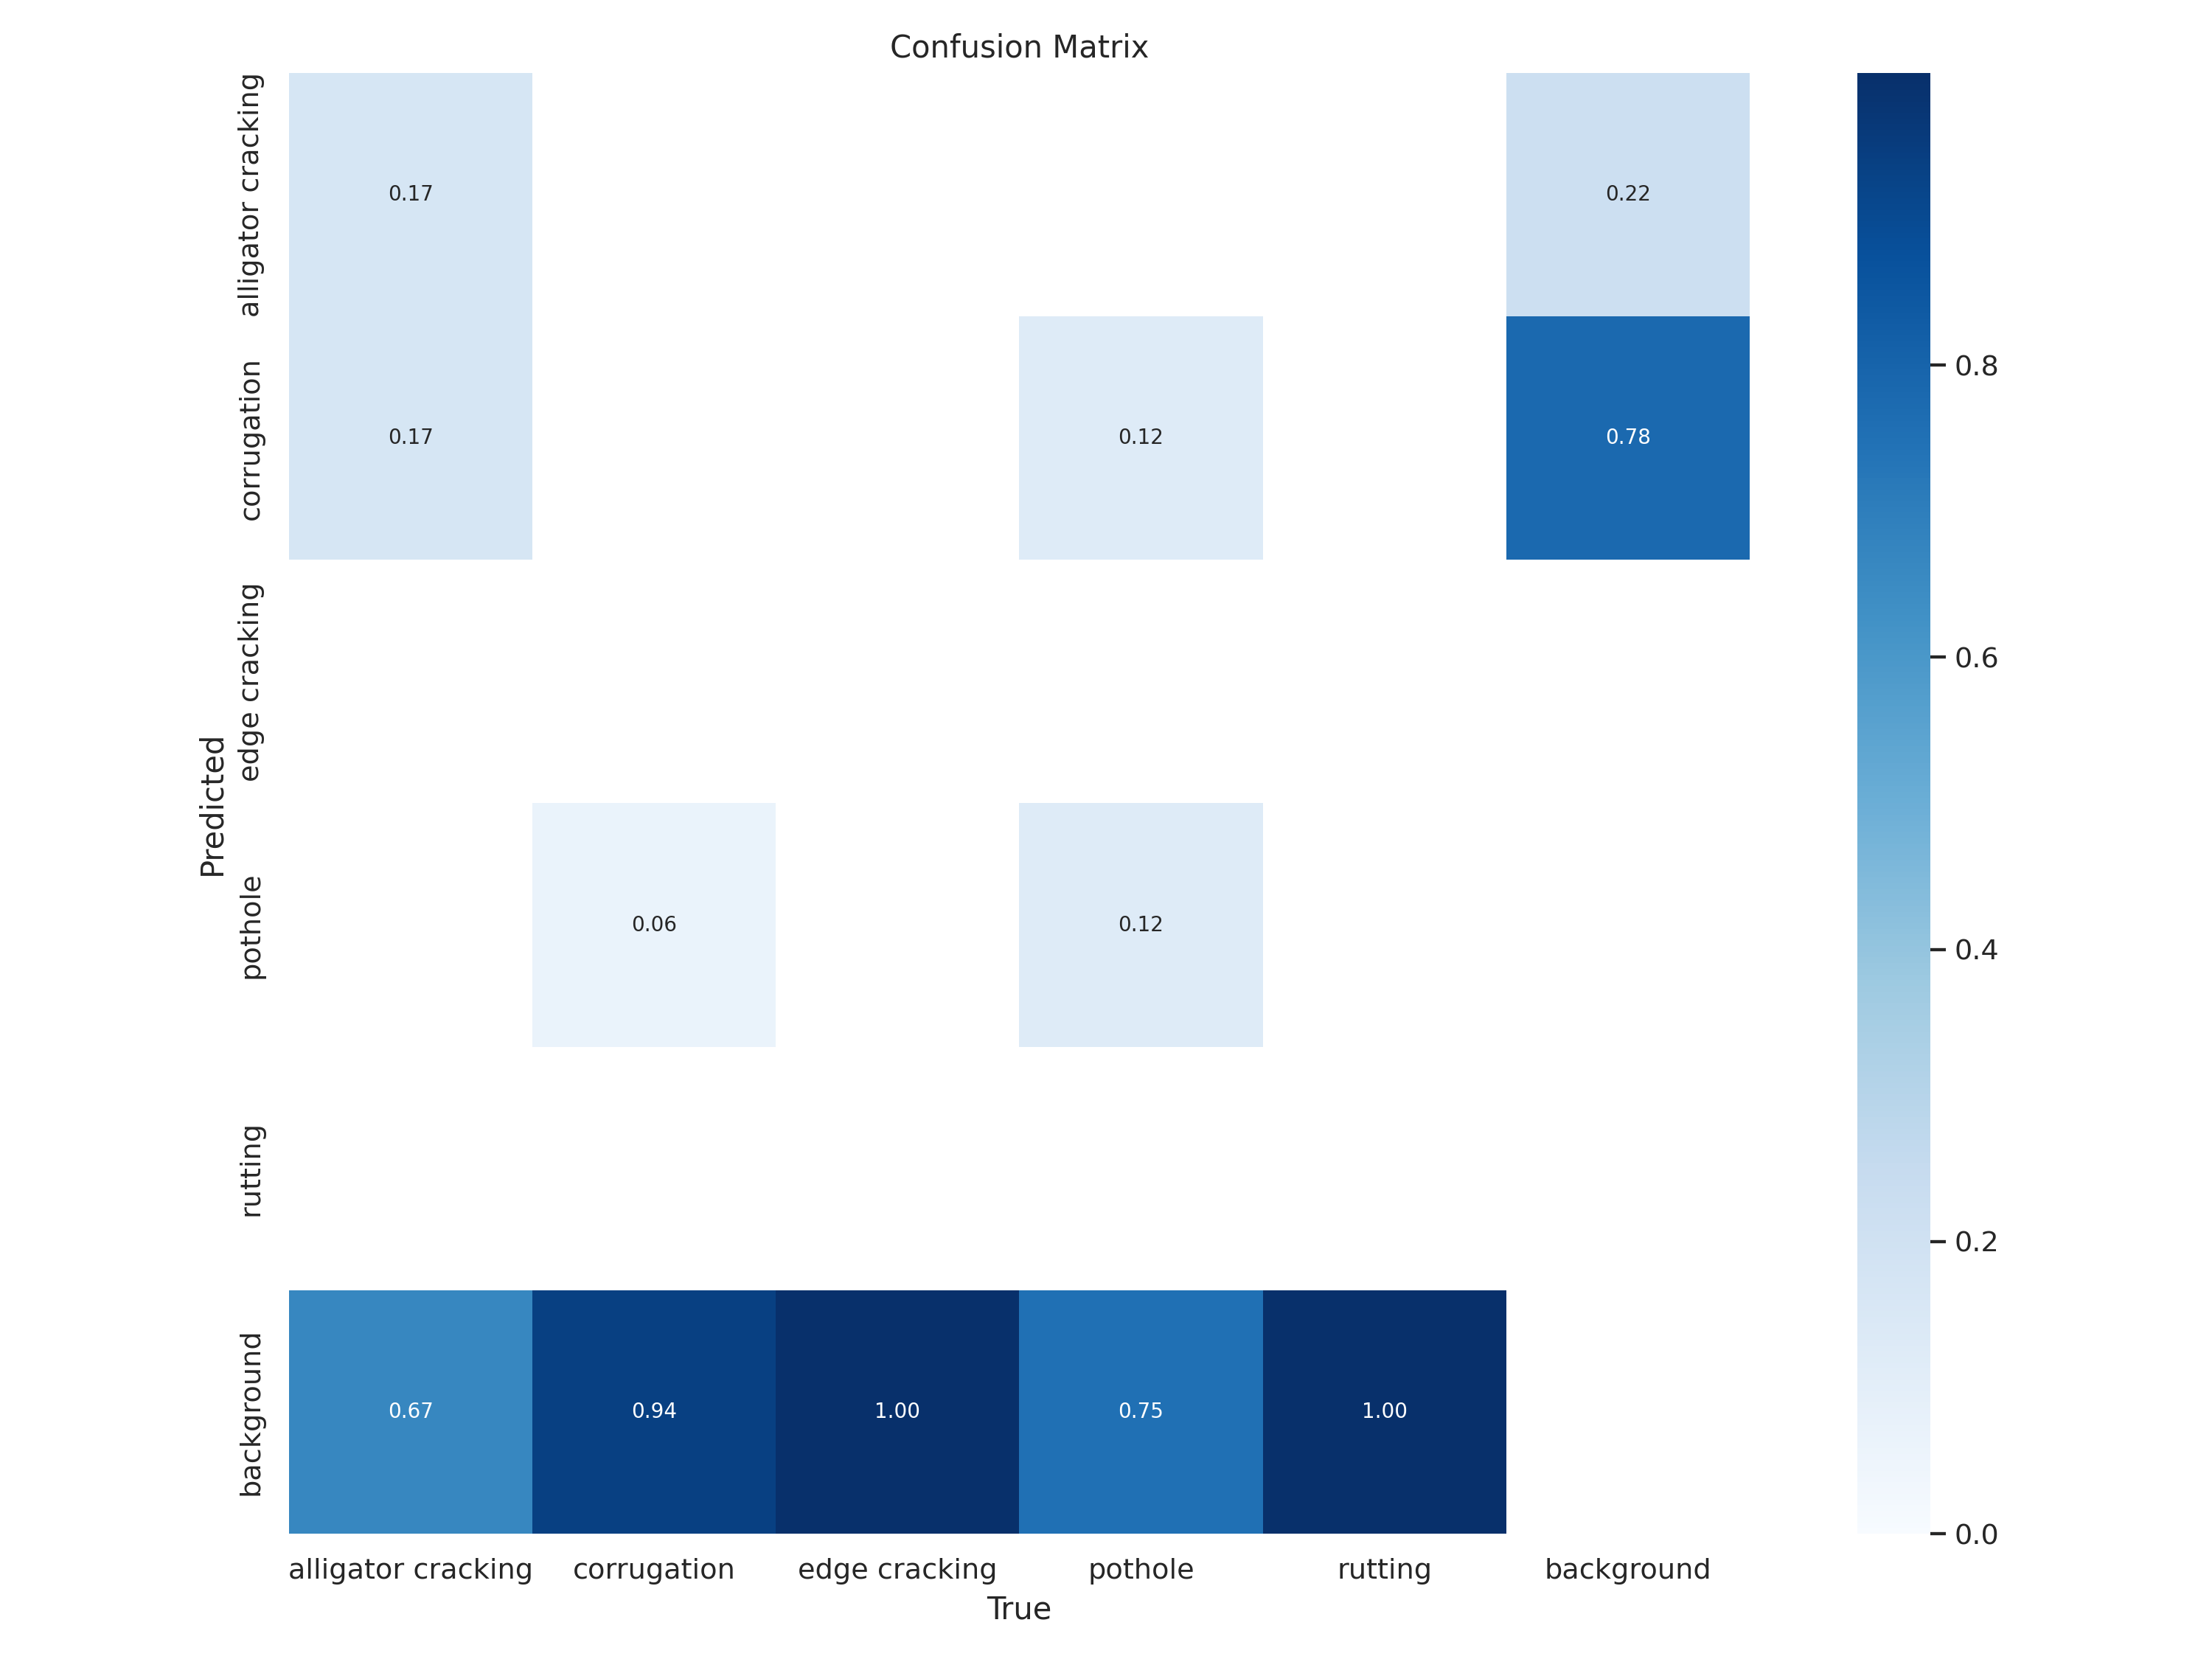

In [ ]:
Image(filename=f'runs/detect/train2/confusion_matrix.png', width=600)

evaluasi lain seperti loss, precission, recall dan mAP50 hasil training model

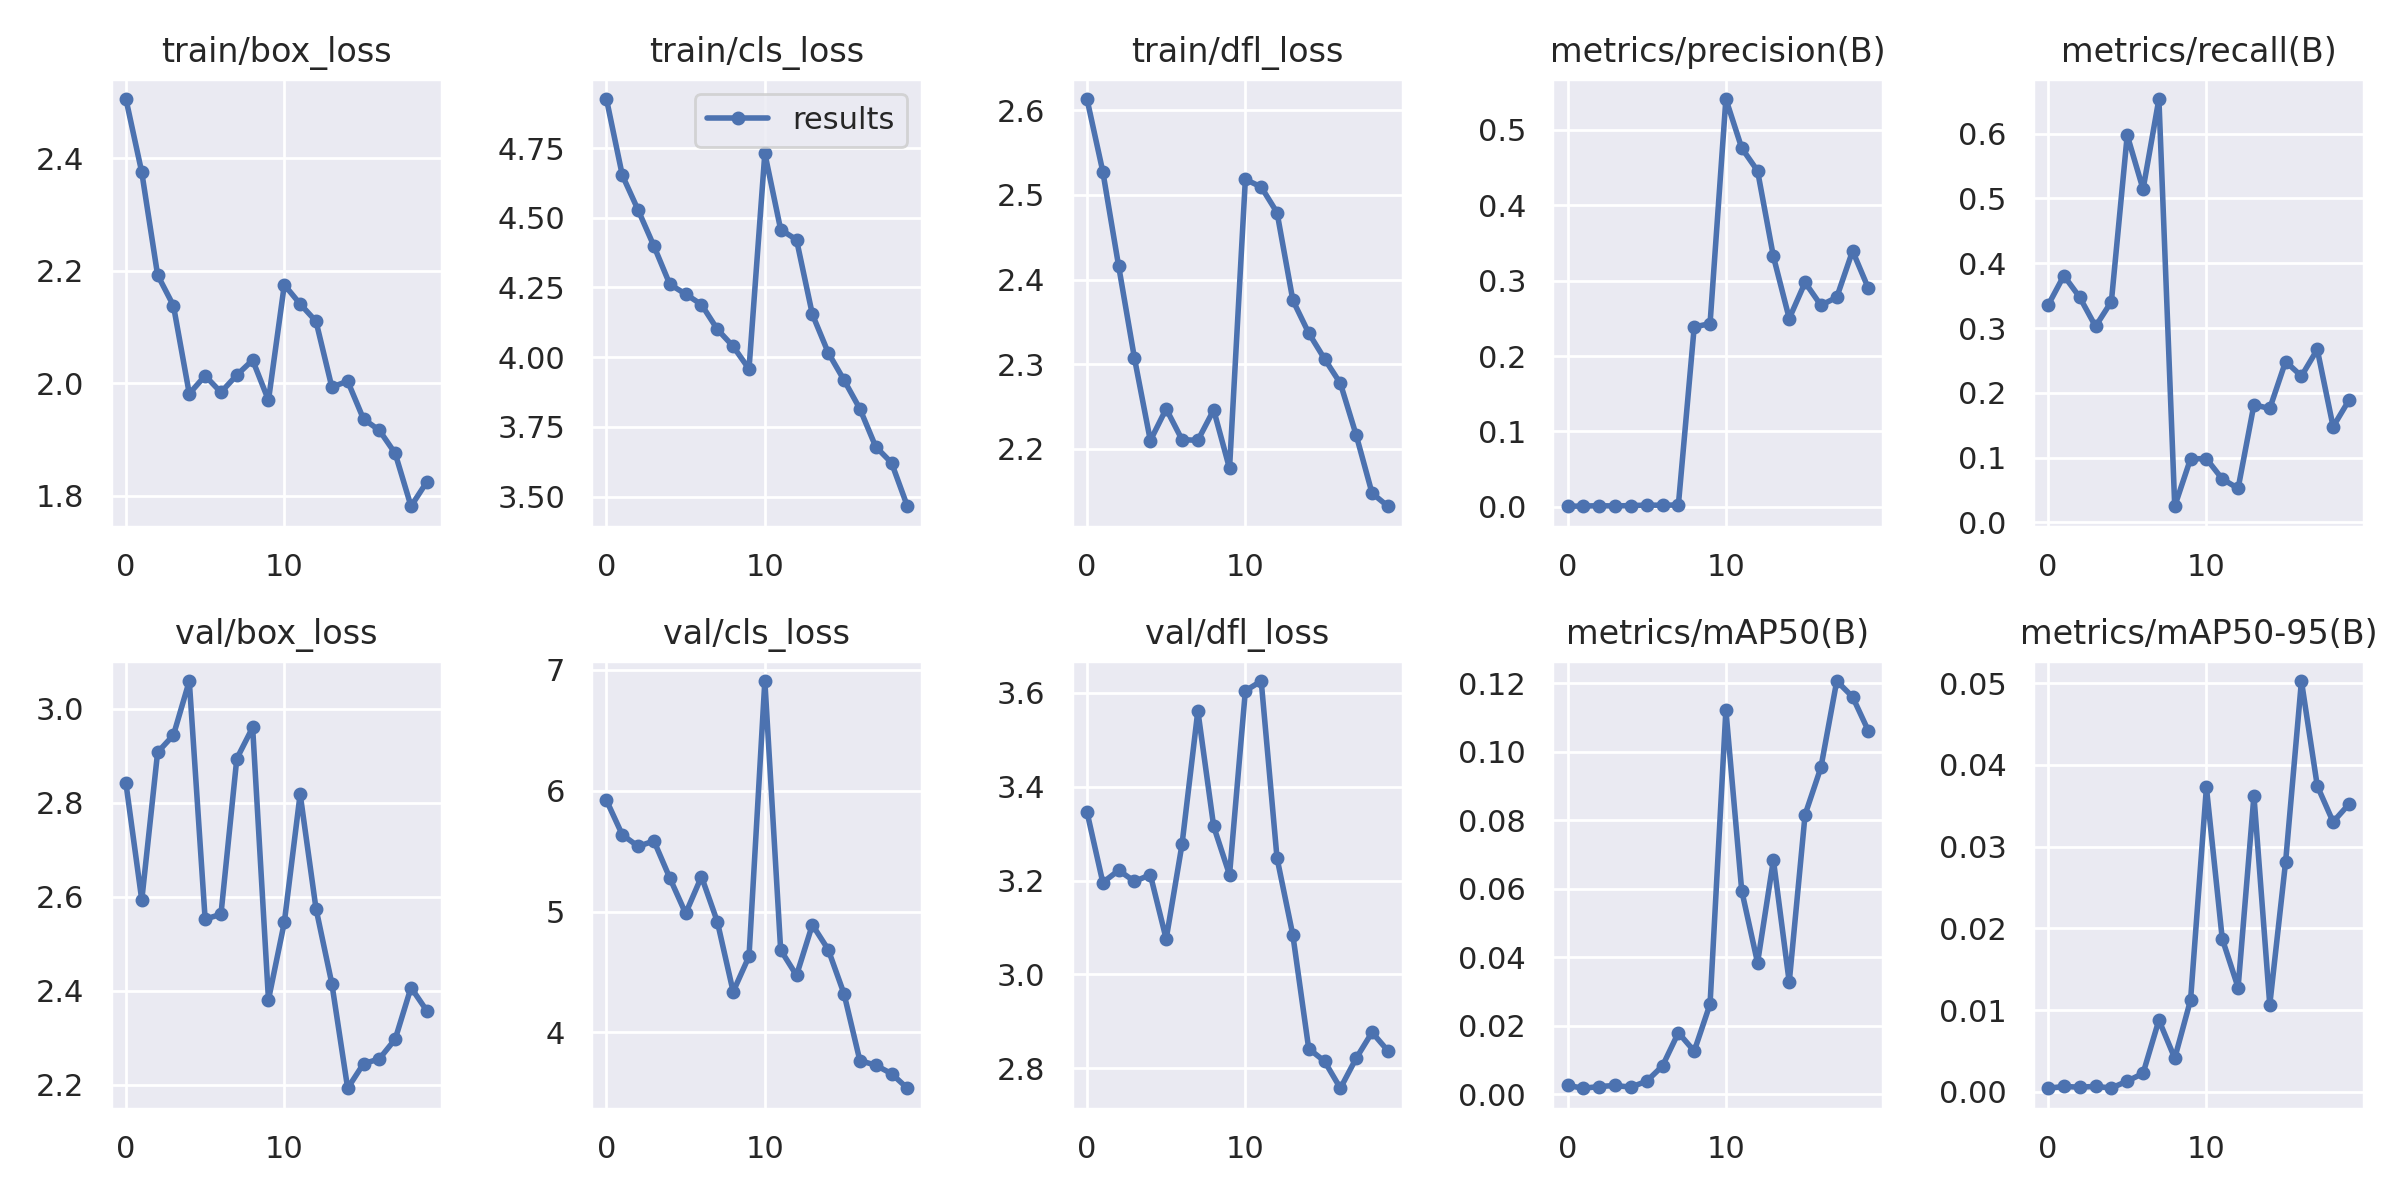

In [ ]:
Image(filename=f'runs/detect/train2/results.png', width=600)

menampilkan ulang nilai R, mAP50 dan mAP50-95 pada model terbaik dengan menggunakan data validasi untuk menghitung nilai R, mAP50 dan mAP50-95

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-11-19 07:00:49.797926: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 07:00:49.797988: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 07:00:49.798043: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 07:00:50.822958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/kerusakan-jalan-yolov8-1/valid/labels.ca